In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
pd.set_option('display.max_columns', None)

In [29]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
df = pd.read_csv('../Data/CancerCvs.csv', sep=';')

In [31]:
def null_percentage(df):
    """
    Returns a DataFrame with the percentage of null (NaN) values per column.
    """
    percentage = df.isnull().mean() * 100
    return percentage.to_frame(name='Null Percentage')


def zero_percentage(df):
    """
    Returns a DataFrame with the percentage of zero values per column.
    """
    percentage = (df == 0).mean() * 100
    return percentage.to_frame(name='Zero Percentage')

In [32]:
df = pd.read_csv('../Data/CancerCvs.csv', sep=';')
df.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,30/11/2020,Liver,II,Radiation,4/12/2020,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,10/10/2015,Leukemia,III,Surgery,5/11/2015,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,13/02/2018,Liver,III,Radiation,3/08/2018,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,4/02/2022,Lung,III,Radiation,13/03/2022,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,3/12/2019,Pancreatic,II,Chemotherapy,29/02/2020,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


In [33]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Nationality', 'Emirate',
       'Diagnosis_Date', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Type',
       'Treatment_Start_Date', 'Hospital', 'Primary_Physician', 'Outcome',
       'Death_Date', 'Cause_of_Death', 'Smoking_Status', 'Comorbidities',
       'Ethnicity', 'Weight', 'Height'],
      dtype='object')

In [34]:
null_percentage(df)

,Null Percentage
Patient_ID,0.00
Age,0.00
Gender,0.00
Nationality,0.00
Emirate,0.00
Diagnosis_Date,0.00
Cancer_Type,0.00
Cancer_Stage,0.00
Treatment_Type,0.00
Treatment_Start_Date,0.00


In [35]:
zero_percentage(df)

,Zero Percentage
Patient_ID,0.0
Age,0.0
Gender,0.0
Nationality,0.0
Emirate,0.0
Diagnosis_Date,0.0
Cancer_Type,0.0
Cancer_Stage,0.0
Treatment_Type,0.0
Treatment_Start_Date,0.0


In [36]:
df['Patient_ID'].value_counts()
# Alta varianza, por tanto se elimina

Patient_ID
PAT009984    1
PAT009983    1
PAT009982    1
PAT009981    1
PAT009980    1
            ..
PAT000005    1
PAT000004    1
PAT000003    1
PAT000002    1
PAT000001    1
Name: count, Length: 10000, dtype: int64

<Axes: xlabel='Diagnosis_Date'>

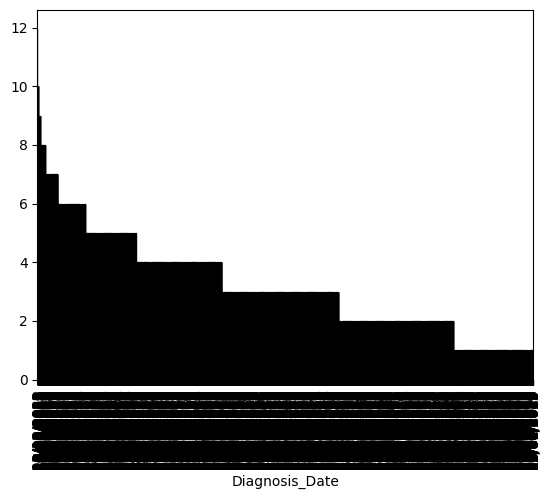

In [37]:
df['Diagnosis_Date'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

In [38]:
df_clean = df.copy()


In [39]:
columns_to_drop = [
    "Patient_ID",         
    "Primary_Physician",  
    "Hospital",           
    "Death_Date",          
    "Cause_of_Death",
    "Comorbidities"      
]
df_clean.drop(columns=columns_to_drop, inplace=True)

In [40]:
df_clean.head()

,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Outcome,Smoking_Status,Ethnicity,Weight,Height
0,69,Female,Emirati,Umm Al Quwain,30/11/2020,Liver,II,Radiation,4/12/2020,Recovered,Non-Smoker,European,61,157
1,32,Male,Emirati,Umm Al Quwain,10/10/2015,Leukemia,III,Surgery,5/11/2015,Recovered,Smoker,South Asian,80,175
2,89,Male,Emirati,Abu Dhabi,13/02/2018,Liver,III,Radiation,3/08/2018,Under Treatment,Non-Smoker,South Asian,50,175
3,78,Female,Emirati,Abu Dhabi,4/02/2022,Lung,III,Radiation,13/03/2022,Recovered,Former Smoker,African,44,155
4,38,Female,Emirati,Fujairah,3/12/2019,Pancreatic,II,Chemotherapy,29/02/2020,Recovered,Former Smoker,East Asian,101,160


In [41]:
df_clean["Diagnosis_Date"] = pd.to_datetime(df_clean["Diagnosis_Date"], dayfirst=True, errors="coerce")
df_clean["Treatment_Start_Date"] = pd.to_datetime(df_clean["Treatment_Start_Date"], dayfirst=True, errors="coerce")

In [42]:
df_clean["Treatment_Delay"] = (df_clean["Treatment_Start_Date"] - df_clean["Diagnosis_Date"]).dt.days


In [43]:
df_clean[["Diagnosis_Date", "Treatment_Start_Date", "Treatment_Delay"]].head()

,Diagnosis_Date,Treatment_Start_Date,Treatment_Delay
0,2020-11-30,2020-12-04,4
1,2015-10-10,2015-11-05,26
2,2018-02-13,2018-08-03,171
3,2022-02-04,2022-03-13,37
4,2019-12-03,2020-02-29,88


VARIABLE TARGET

C:\Users\Esteban\AppData\Local\Temp\ipykernel_20376\488727945.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cancer_Type', data=df, palette='pastel')


<Axes: xlabel='Cancer_Type', ylabel='count'>

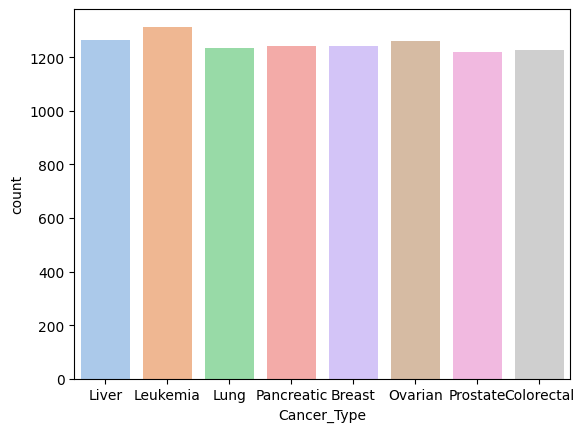

In [44]:
sns.countplot(x='Cancer_Type', data=df, palette='pastel')

In [45]:
print("tamaño antes" , df.shape[0])

tamaño antes 10000


In [46]:
df_clean.head()

,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Outcome,Smoking_Status,Ethnicity,Weight,Height,Treatment_Delay
0,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Recovered,Non-Smoker,European,61,157,4
1,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Recovered,Smoker,South Asian,80,175,26
2,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Under Treatment,Non-Smoker,South Asian,50,175,171
3,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Recovered,Former Smoker,African,44,155,37
4,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Recovered,Former Smoker,East Asian,101,160,88


In [47]:
df_clean["Gender"] = df_clean["Gender"].map({"Male": 1, "Female": 0})
df_clean["Smoking_Status"] = df_clean["Smoking_Status"].map({
    "Smoker": 2,
    "Former Smoker": 1,
    "Non-Smoker": 0
})

In [48]:
df_clean.replace("None", pd.NA, inplace=True)

In [49]:
categorical_columns = [
    "Nationality", "Emirate", "Cancer_Type", "Cancer_Stage",
    "Outcome", "Ethnicity"
]


In [50]:
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns, drop_first=True)

In [51]:
print(f"DataFrame codificado: {df_encoded.shape}")
df_encoded.head()

DataFrame codificado: (10000, 32)


,Age,Gender,Diagnosis_Date,Treatment_Type,Treatment_Start_Date,Smoking_Status,Weight,Height,Treatment_Delay,Nationality_Expatriate,Emirate_Ajman,Emirate_Dubai,Emirate_Fujairah,Emirate_Ras Al Khaimah,Emirate_Sharjah,Emirate_Umm Al Quwain,Cancer_Type_Colorectal,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Ovarian,Cancer_Type_Pancreatic,Cancer_Type_Prostate,Cancer_Stage_II,Cancer_Stage_III,Cancer_Stage_IV,Outcome_Recovered,Outcome_Under Treatment,Ethnicity_Arab,Ethnicity_East Asian,Ethnicity_European,Ethnicity_South Asian
0,69,0.0,2020-11-30,Radiation,2020-12-04,0,61,157,4,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
1,32,1.0,2015-10-10,Surgery,2015-11-05,2,80,175,26,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True
2,89,1.0,2018-02-13,Radiation,2018-08-03,0,50,175,171,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True
3,78,0.0,2022-02-04,Radiation,2022-03-13,1,44,155,37,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False
4,38,0.0,2019-12-03,Chemotherapy,2020-02-29,1,101,160,88,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False


In [52]:
df_clean['Gender'].value_counts()

Gender
0.0    4985
1.0    4827
Name: count, dtype: int64

In [53]:
df_clean['Smoking_Status'].value_counts()

Smoking_Status
0    5038
2    3045
1    1917
Name: count, dtype: int64

In [54]:
df_clean['Cancer_Type'].value_counts()

Cancer_Type
Leukemia      1314
Liver         1263
Ovarian       1259
Pancreatic    1243
Breast        1241
Lung          1233
Colorectal    1226
Prostate      1221
Name: count, dtype: int64

In [55]:
df_clean['Cancer_Type'].value_counts()

Cancer_Type
Leukemia      1314
Liver         1263
Ovarian       1259
Pancreatic    1243
Breast        1241
Lung          1233
Colorectal    1226
Prostate      1221
Name: count, dtype: int64

In [56]:
df_clean['Outcome'].value_counts()

Outcome
Recovered          4931
Under Treatment    4077
Deceased            992
Name: count, dtype: int64

In [57]:
variables_numericas = ['Age', 'Weight', 'Height', 'Treatment_Delay']


<Axes: >

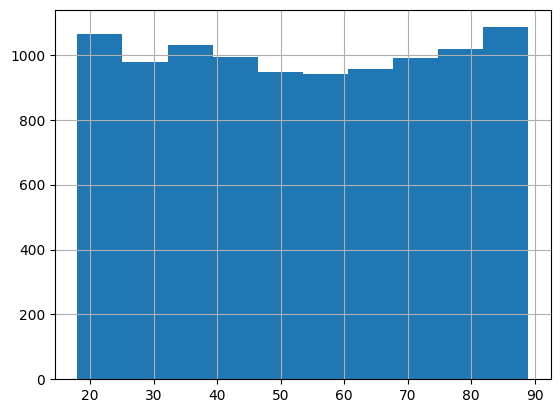

In [58]:
df_clean['Age'].hist()

<Axes: >

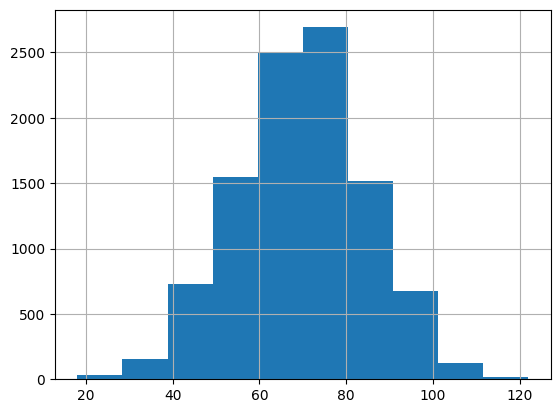

In [59]:
df_clean['Weight'].hist()

<Axes: >

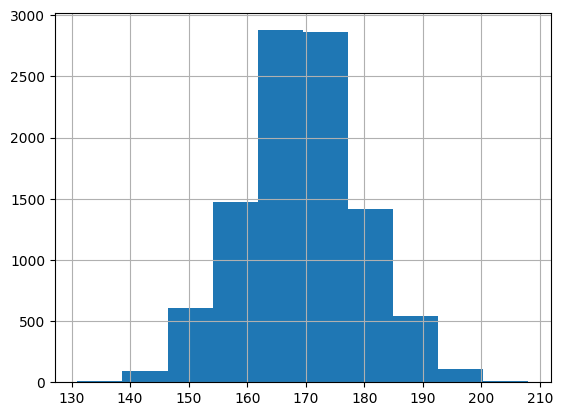

In [60]:
df_clean['Height'].hist()

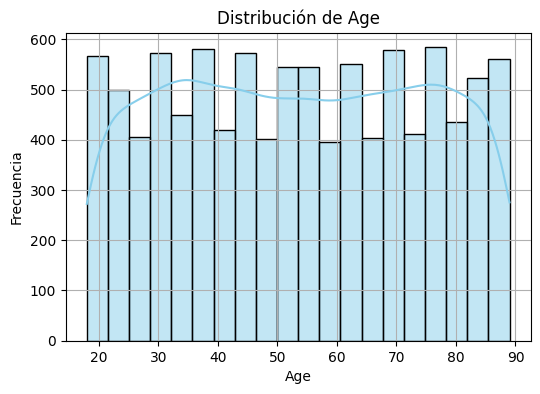

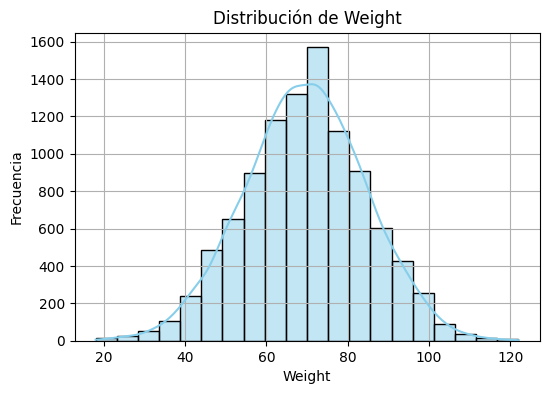

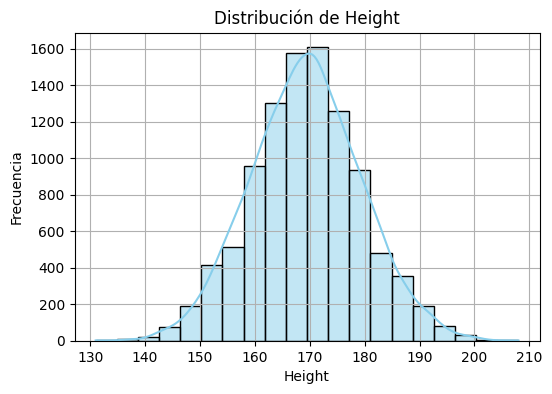

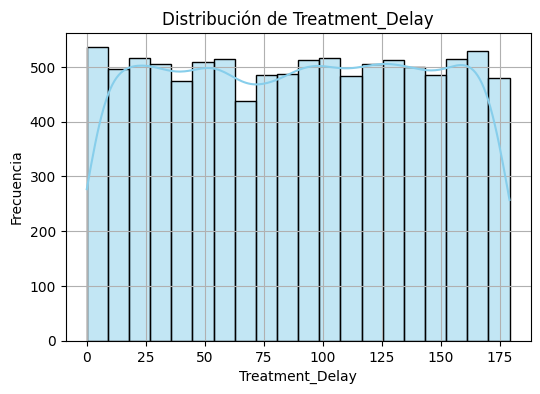

In [61]:
 for col in variables_numericas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_clean[col], bins=20, kde=True, color="skyblue")
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

Detección y eliminación de outliers

In [62]:
def ver_valores_unicos(df, columnas):
    for col in columnas:
        print(f"\nValores únicos en {col}:\n{df[col].value_counts().sort_index()}")

In [63]:
ver_valores_unicos(df_clean, ["Age", "Weight", "Height", "Treatment_Delay"])


Valores únicos en Age:
Age
18    138
19    145
20    144
21    139
22    113
     ... 
85    138
86    146
87    136
88    136
89    143
Name: count, Length: 72, dtype: int64

Valores únicos en Weight:
Weight
18     2
19     2
21     3
22     1
23     4
      ..
116    2
117    2
118    2
120    1
122    2
Name: count, Length: 102, dtype: int64

Valores únicos en Height:
Height
131    1
132    1
136    2
137    2
138    3
      ..
201    2
202    2
204    1
206    1
208    1
Name: count, Length: 72, dtype: int64

Valores únicos en Treatment_Delay:
Treatment_Delay
0      59
1      53
2      67
3      66
4      65
       ..
175    66
176    60
177    61
178    53
179    44
Name: count, Length: 180, dtype: int64


In [64]:
df_clean = df_clean[(df_clean["Age"] > 0) & (df_clean["Age"] < 100)]
df_clean = df_clean[(df_clean["Weight"] > 30) & (df_clean["Weight"] < 200)]
df_clean = df_clean[(df_clean["Height"] > 120) & (df_clean["Height"] < 220)]
df_clean = df_clean[(df_clean["Treatment_Delay"] >= 0) & (df_clean["Treatment_Delay"] < 1000)]

NORMALIZACION

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
columnas_para_cluster = ['Age', 'Weight', 'Height', 'Treatment_Delay']

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[columnas_para_cluster])

In [67]:
df_normalizado = pd.DataFrame(X_scaled, columns=columnas_para_cluster)

In [68]:
inertia = []
rango_k = range(1, 11)

for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalizado)
    inertia.append(kmeans.inertia_)

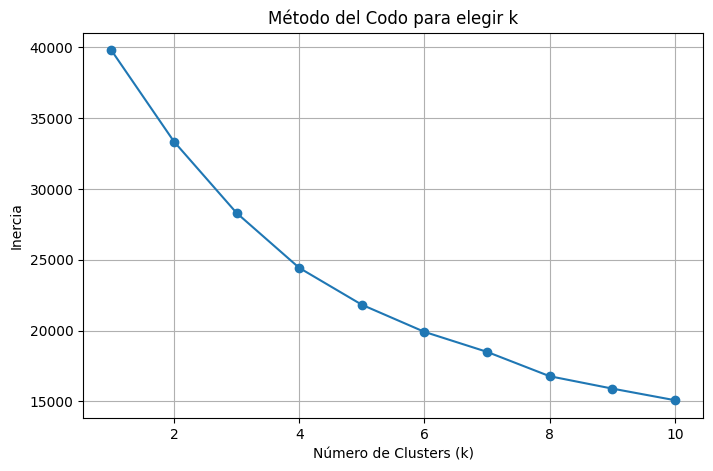

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(rango_k, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para elegir k')
plt.grid(True)
plt.show()

-El gráfico muestra cómo disminuye la inercia (variación interna) al aumentar el número de clústeres.
-El "codo" o punto de inflexión sugiere el número óptimo de grupos.
-A partir de ese punto, agregar más clústeres no mejora significativamente la agrupación.

In [70]:
from sklearn.cluster import KMeans

k = 4  # puedes cambiarlo según el codo que hayas visto
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_normalizado)

df_clean['cluster'] = clusters

print("Cantidad de pacientes por grupo:")
print(df_clean['cluster'].value_counts())

print("\nResumen estadístico por grupo:")
print(df_clean.groupby('cluster')[['Age', 'Weight', 'Height', 'Treatment_Delay']].mean())

Cantidad de pacientes por grupo:
cluster
2    2581
3    2494
1    2468
0    2408
Name: count, dtype: int64

Resumen estadístico por grupo:
               Age     Weight      Height  Treatment_Delay
cluster                                                   
0        37.244601  79.944352  171.561047        55.674003
1        36.821718  61.068882  167.938412       129.093598
2        67.697017  62.235180  167.831073        43.949632
3        71.170810  76.336808  170.150762       129.479551


In [76]:
print(df_encoded.columns.tolist())

['Age', 'Gender', 'Diagnosis_Date', 'Treatment_Type', 'Treatment_Start_Date', 'Smoking_Status', 'Weight', 'Height', 'Treatment_Delay', 'Nationality_Expatriate', 'Emirate_Ajman', 'Emirate_Dubai', 'Emirate_Fujairah', 'Emirate_Ras Al Khaimah', 'Emirate_Sharjah', 'Emirate_Umm Al Quwain', 'Cancer_Type_Colorectal', 'Cancer_Type_Leukemia', 'Cancer_Type_Liver', 'Cancer_Type_Lung', 'Cancer_Type_Ovarian', 'Cancer_Type_Pancreatic', 'Cancer_Type_Prostate', 'Cancer_Stage_II', 'Cancer_Stage_III', 'Cancer_Stage_IV', 'Outcome_Recovered', 'Outcome_Under Treatment', 'Ethnicity_Arab', 'Ethnicity_East Asian', 'Ethnicity_European', 'Ethnicity_South Asian']


In [77]:
import numpy as np

df_encoded["Final_Grade"] = np.random.randint(60, 100, size=len(df_encoded))  # por ejemplo entre 60 y 100

# Ahora puedes separar X e y como esperabas
y = df_encoded["Final_Grade"]
X = df_encoded.drop(columns=["Final_Grade"])

In [78]:
from sklearn.model_selection import train_test_split

# 80% train + 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 80% de train_val para entrenamiento (64% total) y 20% para validación (16% total)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [79]:
train = pd.concat([X_train, y_train], axis=1)
val = pd.concat([X_val, y_val], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [80]:
# Asegura la carpeta destino
import os
os.makedirs("Data", exist_ok=True)

# Guarda como archivos Excel
train.to_excel("../Data/train.xlsx", index=False)
val.to_excel("../Data/validation.xlsx", index=False)
test.to_excel("../Data/test.xlsx", index=False)

print("✅ Archivos Excel guardados correctamente:")
print("- Data/train.xlsx")
print("- Data/validation.xlsx")
print("- Data/test.xlsx")

✅ Archivos Excel guardados correctamente:
- Data/train.xlsx
- Data/validation.xlsx
- Data/test.xlsx


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

columnas_fecha = ["Diagnosis_Date", "Treatment_Start_Date"]
columnas_a_quitar = [col for col in columnas_fecha if col in df_encoded.columns]


X = df_encoded.drop(columns=["Treatment_Type"] + columnas_a_quitar)
y = df_encoded["Treatment_Type"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

modelo = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)


y_pred = modelo.predict(X_test)

print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.242

Reporte de clasificación:
               precision    recall  f1-score   support

 Chemotherapy       0.20      0.12      0.15       746
Immunotherapy       0.28      0.09      0.13       749
    Radiation       0.24      0.45      0.32       756
      Surgery       0.25      0.31      0.28       749

     accuracy                           0.24      3000
    macro avg       0.24      0.24      0.22      3000
 weighted avg       0.24      0.24      0.22      3000



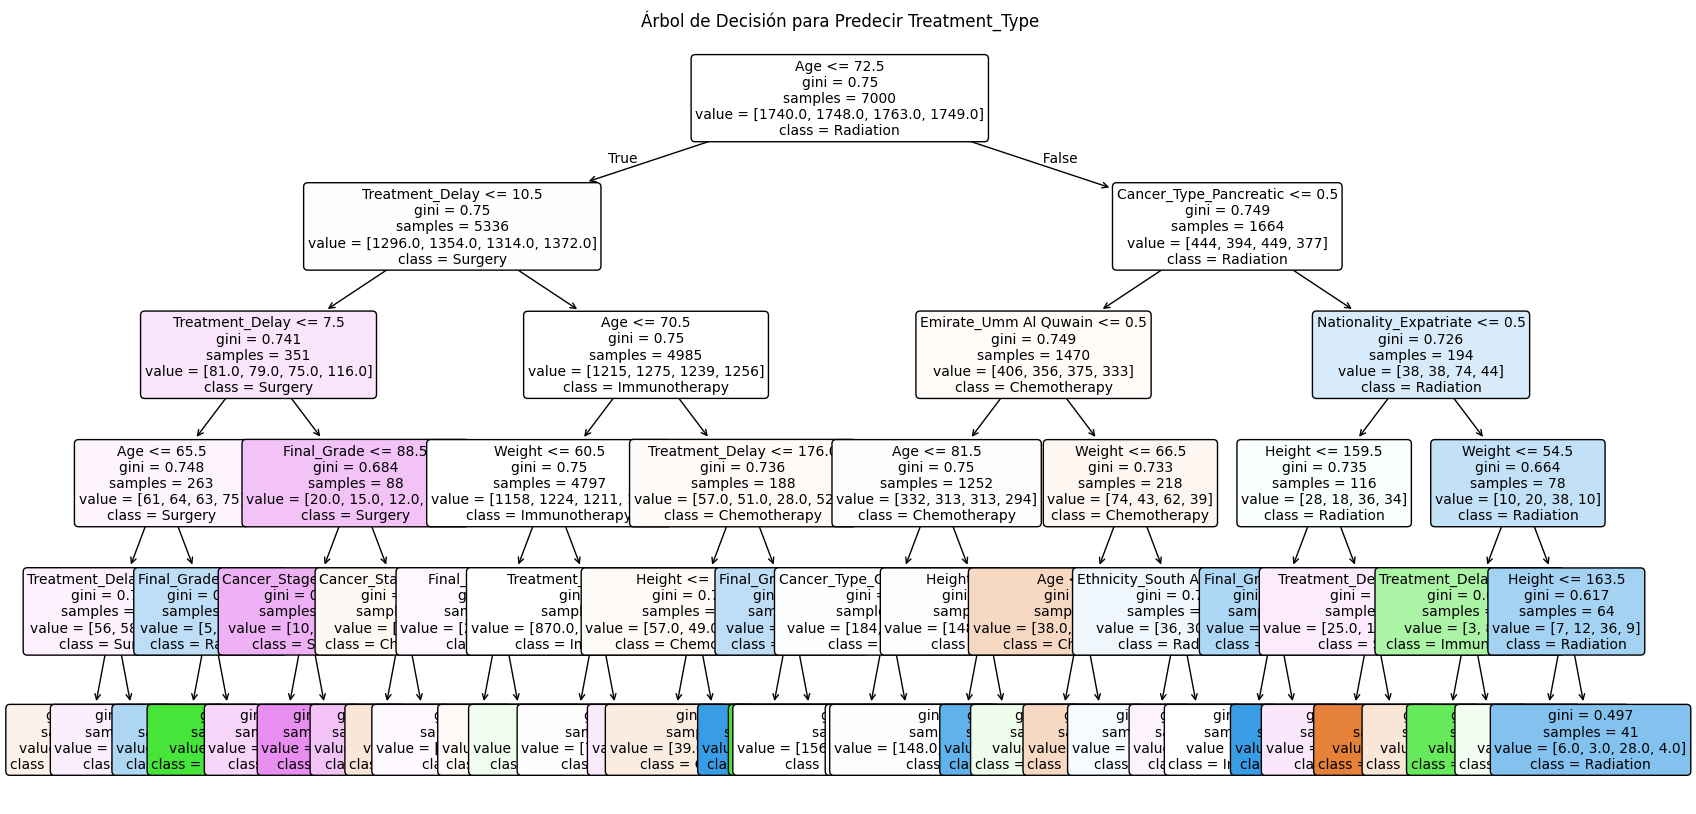

In [82]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Establecer el tamaño del gráfico
plt.figure(figsize=(20, 10))

# Dibujar el árbol entrenado
plot_tree(modelo, 
          feature_names=X.columns,
          class_names=modelo.classes_,
          filled=True, 
          rounded=True, 
          fontsize=10)

plt.title("Árbol de Decisión para Predecir Treatment_Type")
plt.show()

Que muestra este arbol

Cómo el modelo toma decisiones con base en variables como edad, peso, tipo de cáncer, etc.

Qué condiciones lleva a predecir cada tipo de tratamiento.

Qué variables son más importantes en la clasificación.

In [ ]:
print(df_encoded["Treatment_Type"].value_counts())

Treatment_Type
Radiation        2519
Surgery          2498
Immunotherapy    2497
Chemotherapy     2486
Name: count, dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Convertir bool a int antes de imputar
X = X.astype({col: int for col in X.select_dtypes('bool').columns})

# Separar tipos de columnas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocesamiento con imputación
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), num_cols),
        ('cat', SimpleImputer(strategy='most_frequent'), cat_cols)
    ],
    remainder='passthrough'
)

# Modelos a comparar
modelos = {
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Bosque Aleatorio": RandomForestClassifier(n_estimators=100, random_state=42),
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "K-Vecinos": KNeighborsClassifier(n_neighbors=5)
}

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Evaluar todos los modelos
for nombre, modelo in modelos.items():
    print(f"\n🔎 Evaluando modelo: {nombre}")
    pipe = Pipeline(steps=[
        ('preprocesado', preprocessor),
        ('modelo', modelo)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print(f"Precisión: {accuracy_score(y_test, y_pred):.4f}")
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred))


🔎 Evaluando modelo: Árbol de Decisión
Precisión: 0.2430
Reporte de clasificación:
               precision    recall  f1-score   support

 Chemotherapy       0.20      0.09      0.12       746
Immunotherapy       0.27      0.09      0.13       749
    Radiation       0.24      0.46      0.32       756
      Surgery       0.25      0.34      0.29       749

     accuracy                           0.24      3000
    macro avg       0.24      0.24      0.21      3000
 weighted avg       0.24      0.24      0.21      3000


🔎 Evaluando modelo: Bosque Aleatorio
Precisión: 0.2507
Reporte de clasificación:
               precision    recall  f1-score   support

 Chemotherapy       0.24      0.25      0.24       746
Immunotherapy       0.24      0.25      0.25       749
    Radiation       0.27      0.27      0.27       756
      Surgery       0.24      0.24      0.24       749

     accuracy                           0.25      3000
    macro avg       0.25      0.25      0.25      3000
 weig

c:\Users\Esteban\Downloads\ProyectIA\Proyecto_IA_CAIRE\proyectoIVAN\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión: 0.2393
Reporte de clasificación:
               precision    recall  f1-score   support

 Chemotherapy       0.21      0.17      0.19       746
Immunotherapy       0.23      0.26      0.24       749
    Radiation       0.27      0.24      0.25       756
      Surgery       0.24      0.29      0.26       749

     accuracy                           0.24      3000
    macro avg       0.24      0.24      0.24      3000
 weighted avg       0.24      0.24      0.24      3000


🔎 Evaluando modelo: K-Vecinos
Precisión: 0.2470
Reporte de clasificación:
               precision    recall  f1-score   support

 Chemotherapy       0.23      0.30      0.26       746
Immunotherapy       0.25      0.28      0.27       749
    Radiation       0.27      0.25      0.26       756
      Surgery       0.24      0.15      0.19       749

     accuracy                           0.25      3000
    macro avg       0.25      0.25      0.24      3000
 weighted avg       0.25      0.25      0.24      3